# Benchmarking `xaitk-saliency`/`pytorch-lightning` Integration Strategies

This notebook utilizes PyTorch's benchmarking capability, along with [`submitit`](https://github.com/facebookincubator/submitit), to compare the high- vs low-level integrations of `xaitk-saliency` for `pytorch-lightning` from a speed standpoint.

## Table of Contents

* [Environment Setup](#environment-setup)
* [Imports](#imports)
* [Defining the `submitit` Trainer](#defining-submitit-trainer)
* [Defining the `submitit` App](#defining-submitit-app)
* [Load Models from Checkpoint](#load-models-from-checkpoint)
* [Benchmarking](#benchmarking)
  * [GPU Sweep](#gpu-sweep)
  * [Mask Sweep](#mask-sweep)

## Environment Setup <a name="environment-setup"></a>

In [1]:
import sys  # noqa:F401

!{sys.executable} -m pip install -qU pip
print("Installing submitit...")
!{sys.executable} -m pip install -q 'submitit'
print("Done!")

Installing submitit...
Done!


We'll use some Jupyter Magic so that we don't have to reproduce all of the code from the integration notebook:

Installing torchmetrics...
Installing ipython...
Installing setuptools...
Installing torch...
Installing pytorch-lightning...
Installing torchvision...
Installing xaitk-saliency...
Installing matplotlib...
Done!


Global seed set to 0
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the 

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 855 K 
-------------------------------------
855 K     Trainable params
0         Non-trainable params
855 K     Total params
3.420     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This li

Predicting: 176it [00:00, ?it/s]

/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/pytorch_lightning/loops/epoch/prediction_epoch_loop.py:173: UserWarning: Lightning couldn't infer the indices fetched for your dataloader.
  warning_cache.warn("Lightning couldn't infer the indices fetched for your dataloader.")


Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at cifar10.ckpt


Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This li

Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at cifar10.ckpt


Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This li

Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at cifar10.ckpt


Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This li

Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at cifar10.ckpt


Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This li

Predicting: 176it [00:00, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at cifar10.ckpt


Predicting: 176it [00:00, ?it/s]

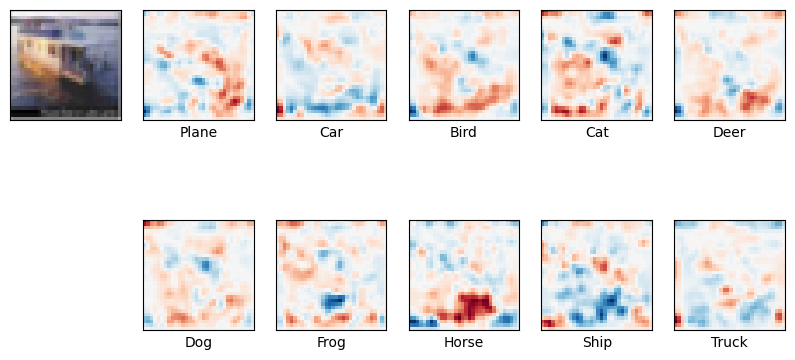

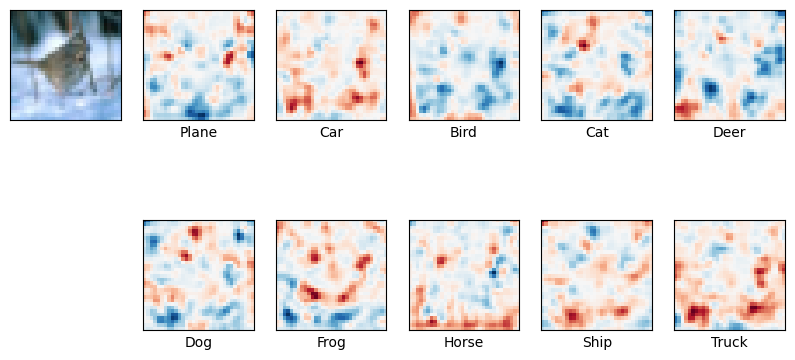

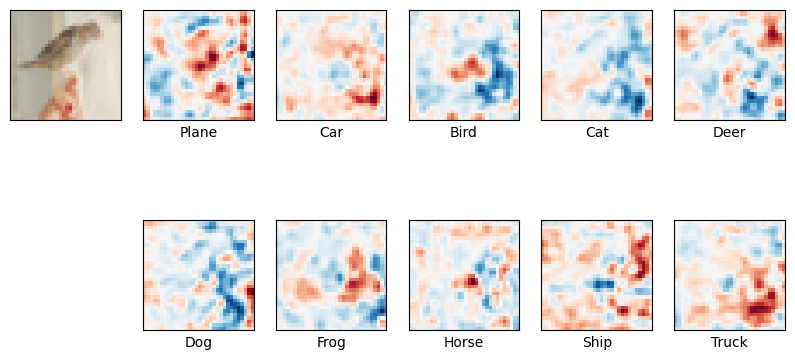

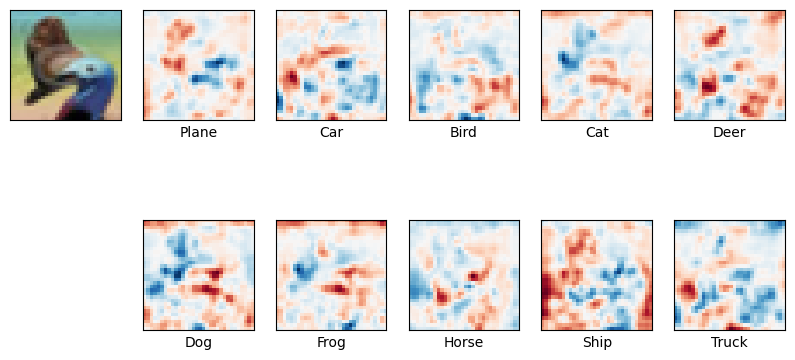

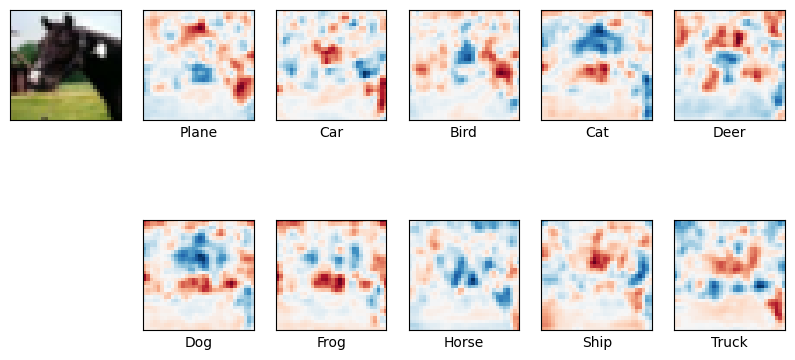

/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

Files already downloaded and verified
Files already downloaded and verified


You are using a CUDA device ('NVIDIA RTX A3000 12GB Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at cifar10.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at cifar10.ckpt
/home/local/KHQ/alexander.lynch/anaconda3/envs/xaitk-jatic/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

tensor([-0.5352,  1.1187, -1.5610, -0.5175, -0.8268, -1.5890, -1.2913, -0.9262,
         2.0884,  1.4829], device='cuda:0')
tensor([-0.5352,  1.1187, -1.5610, -0.5175, -0.8268, -1.5890, -1.2913, -0.9262,
         2.0884,  1.4829], device='cuda:0') ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] pred
tensor([0.0328, 0.1809, 0.0132, 0.0383, 0.0280, 0.0137, 0.0176, 0.0243, 0.4172,
        0.2340], device='cuda:0') ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] pred
tensor([0.0328, 0.1785, 0.0119, 0.0355, 0.0258, 0.0125, 0.0164, 0.0219, 0.4306,
        0.2340], device='cuda:0') ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] pred
tensor([0.0325, 0.1748, 0.0117, 0.0347, 0.0251, 0.0118, 0.0161, 0.0210, 0.4415,
        0.2307], device='cuda:0') ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] pred
tensor([0.0325, 0.1703, 0.0122, 0.0356, 0.0255, 0.0123, 0.0174, 0.

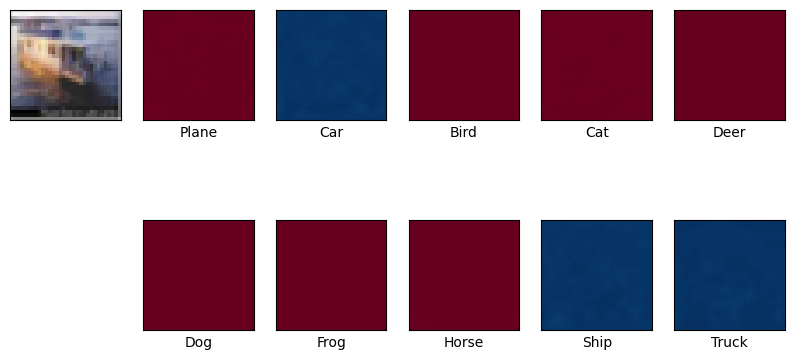

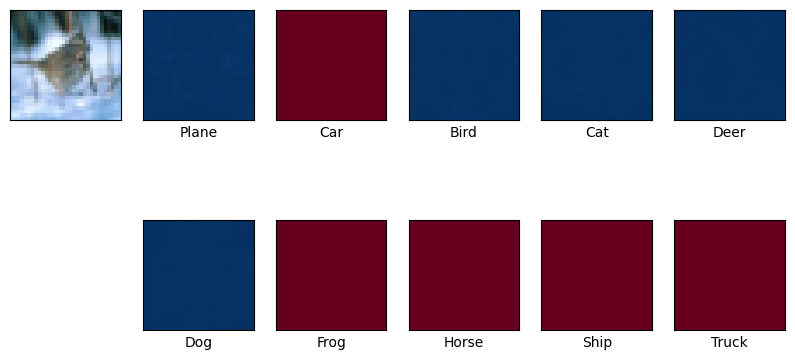

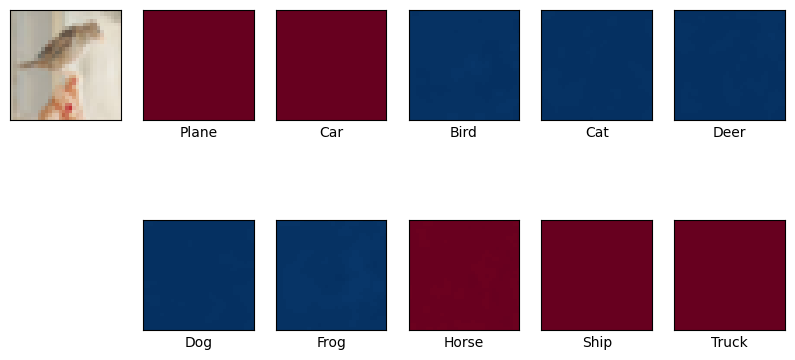

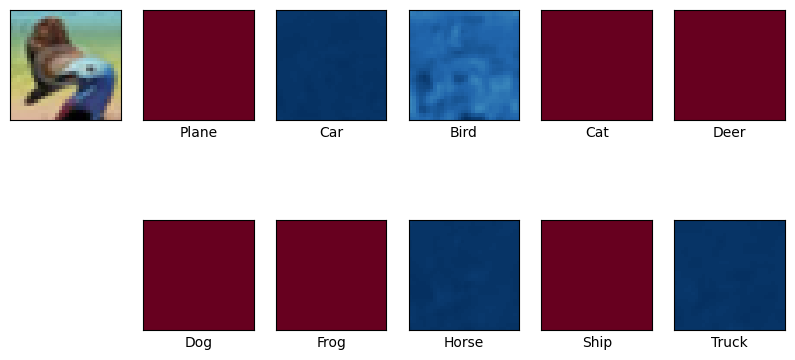

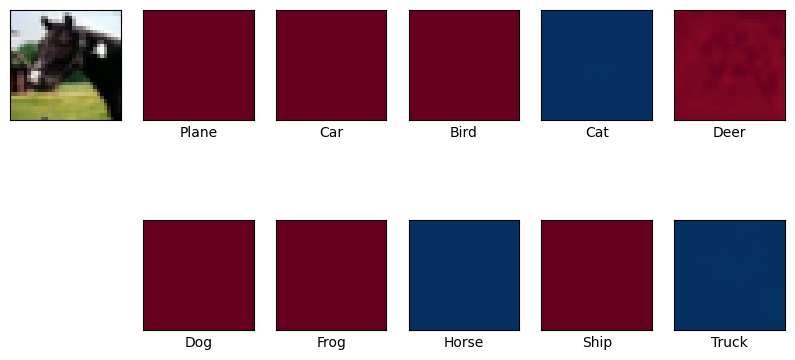

[False, False, False, False, False]


ValueError: all(allclose) needs to be True

ValueError: all(allclose) needs to be True

In [1]:
%run xaitk-lightning.ipynb

## Imports <a name="imports"></a>

In [ ]:
from collections.abc import Mapping
from typing import Any

import pytorch_lightning as pl
import submitit
import torch.utils.benchmark as benchmark
from submitit.core.core import Executor
from xaitk_saliency.impls.gen_classifier_conf_sal.rise_scoring import RISEScoring
from xaitk_saliency.impls.gen_image_classifier_blackbox_sal.rise import RISEStack
from xaitk_saliency.impls.perturb_image.rise import RISEGrid

In [ ]:
BATCH_SIZE = 256
PREDICT_SIZE = 5
CHKPT_PATH = "cifar10.ckpt"

## Defining the `submitit` Trainer <a name="defining-submitit-trainer"></a>

The `ddp` scaling strategy cannot be used within interactive environments so we'll use `submitit` to create Slurm jobs where `ddp` can be used.

In [ ]:
class SubmititTrainer:
    """
    A wrapper for PyTorch Lightning Trainer using Submitit for distributed training and job submission.

    This class does not inherit from `Trainer` to enable compatibility with distributed data parallelism (DDP)
    in notebooks or other environments where traditional Trainer inheritance might conflict.

    Attributes:
        executor (submitit.AutoExecutor): The Submitit executor for job submission.
        devices (int): Number of devices (GPUs) for training.
        kwargs (dict): Additional keyword arguments for PyTorch Lightning Trainer configuration.
    """

    def __init__(self, executor: Executor | None = None, devices: int = 1, **kwargs: Any) -> None:
        """PyTorch Lightning Trainer Wrapped by Submitit.

        This class does not inherit `Trainer` because we want to support DDP in the notebook.

        Parameters
        ----------
        executor: Executor | None (default: None)
            The submitit executor, if `None` it uses a default local executor.
        devices: int = 1
            The devices for `pl.Trainer`
        **kwargs: Any
            Arguments for `pl.Trainer`
        """
        self.kwargs = kwargs
        self.devices = devices

        if executor is None:
            self.executor = submitit.AutoExecutor(folder="submitit_logs", cluster="slurm")
            self.executor.update_parameters(
                gpus_per_node=devices,
                slurm_partition="community",
                slurm_account="xai",
                timeout_min=180,
            )

    def _init_trainer(self) -> pl.trainer:
        """
        Initializes a PyTorch Lightning Trainer.

        Returns:
            Trainer: Configured PyTorch Lightning Trainer instance.
        """
        return pl.Trainer(devices=self.devices, **self.kwargs)

    def _fit(self, *args: Any, **kwargs: Any) -> None:
        """
        Internal method to perform model training using PyTorch Lightning Trainer.

        Args:
            *args (Any): Positional arguments for the Trainer's `fit` method.
            **kwargs (Any): Keyword arguments for the Trainer's `fit` method.

        Returns:
            Any: The result of the Trainer's `fit` method.
        """
        trainer = self._init_trainer()
        return trainer.fit(*args, **kwargs)

    def _test(self, *args: Any, **kwargs: Any) -> list[Mapping[str, float]]:
        """
        Internal method to perform model testing using PyTorch Lightning Trainer.

        Args:
            *args (Any): Positional arguments for the Trainer's `test` method.
            **kwargs (Any): Keyword arguments for the Trainer's `test` method.

        Returns:
            Any: The result of the Trainer's `test` method.
        """
        trainer = self._init_trainer()
        return trainer.test(*args, **kwargs)

    def _predict(self, *args: Any, **kwargs: Any) -> list[Any] | list[list[Any]] | None:
        """
        Internal method to perform model predictions using PyTorch Lightning Trainer.

        Args:
            *args (Any): Positional arguments for the Trainer's `predict` method.
            **kwargs (Any): Keyword arguments for the Trainer's `predict` method.

        Returns:
            Any: The result of the Trainer's `predict` method.
        """
        trainer = self._init_trainer()
        return trainer.predict(*args, **kwargs)

    def fit(self, *args: Any, **kwargs: Any) -> submitit.Job:
        """
        Submits a job for training the model using the Submitit executor.

        Args:
            *args (Any): Positional arguments for the Trainer's `fit` method.
            **kwargs (Any): Keyword arguments for the Trainer's `fit` method.

        Returns:
            submitit.Job: The submitted job instance for training.
        """
        return self.executor.submit(self._fit, *args, **kwargs)

    def test(self, *args: Any, **kwargs: Any) -> submitit.Job:
        """
        Submits a job for testing the model using the Submitit executor.

        Args:
            *args (Any): Positional arguments for the Trainer's `test` method.
            **kwargs (Any): Keyword arguments for the Trainer's `test` method.

        Returns:
            submitit.Job: The submitted job instance for testing.
        """
        return self.executor.submit(self._test, *args, **kwargs)

    def predict(self, *args: Any, **kwargs: Any) -> submitit.Job:
        """
        Submits a job for making predictions using the Submitit executor.

        Args:
            *args (Any): Positional arguments for the Trainer's `predict` method.
            **kwargs (Any): Keyword arguments for the Trainer's `predict` method.

        Returns:
            submitit.Job: The submitted job instance for predictions.
        """
        return self.executor.submit(self._predict, *args, **kwargs)

## Defining the `submitit` App <a name="defining-submitit-app"></a>

We'll also need to modify our "app" definition to use `submitit`.

In [5]:
import matplotlib.pyplot as plt
import numpy as np


class SubmititApp:
    """
    A PyTorch Lightning Trainer wrapped by Submitit for distributed training and saliency map generation.

    Attributes:
        executor (AutoExecutor): The Submitit executor for job submission.
        devices (int): Number of devices (GPUs) to use for training.
        kwargs (dict): Additional keyword arguments for the PyTorch Lightning Trainer.
        model (Optional[pl.LightningModule]): PyTorch Lightning model to be trained or evaluated.
        tnsfm (Optional[callable]): Optional transformation function for preprocessing input data.
        labels (Optional[list]): Class labels for the dataset.
    """

    def __init__(self, executor: Executor | None = None, devices: int = 1, **kwargs: Any) -> None:
        """PyTorch Lightning Trainer Wrapped by Submitit.

        This class does not inherit `Trainer` because we want to support DDP in the notebook.

        Parameters
        ----------
        executor: Executor | None (default: None)
            The submitit executor, if `None` it uses a default local executor.
        devices: int = 1
            The devices for `pl.Trainer`
        **kwargs: Any
            Arguments for `pl.Trainer`
        """
        self.kwargs = kwargs
        self.devices = devices

        if executor is None:
            self.executor = submitit.AutoExecutor(folder="submitit_logs", cluster="slurm")
            self.executor.update_parameters(
                gpus_per_node=devices,
                slurm_partition="community",
                slurm_account="xai",
                timeout_min=180,
            )

        self.model = None
        self.tnsfm = None
        self.labels = None

    def _init_trainer(self) -> pl.Trainer:
        """
        Initializes a PyTorch Lightning Trainer.

        Returns:
            pl.Trainer: Configured PyTorch Lightning Trainer instance.
        """
        return pl.Trainer(devices=self.devices, **self.kwargs)

    def _app(  # noqa:C901
        self,
        images: np.ndarray,
        saliency_generator: GenerateImageClassifierBlackboxSaliency,  # noqa:F821
        display_results: bool = False,
    ) -> None:
        """
        The main application logic to generate saliency maps for input images.

        Args:
            images (np.ndarray): Array of input images.
            saliency_generator (GenerateImageClassifierBlackboxSaliency):
                Callable to generate saliency maps.
            display_results (bool): Whether to display saliency maps. Defaults to False.
        """
        trainer = self._init_trainer()
        image_classifier = PytorchLightningClassifier(trainer, self.labels, self.tnsfm, self.model)  # noqa:F821

        # Generate saliency maps
        sal_maps_set = []
        for img in images:
            sal_maps = saliency_generator(img, image_classifier)
            sal_maps_set.append(sal_maps)

        # Plot each image in set with saliency maps
        if display_results:
            # Get class labels
            labels = self.labels
            num_classes = len(labels)

            for i in range(len(images)):
                plt.figure(figsize=(10, 5))
                num_cols = np.ceil(num_classes / 2).astype(int) + 1
                plt.subplot(2, num_cols, 1)
                plt.imshow(images[i], cmap="gray")
                plt.xticks(())
                plt.yticks(())

                for c in range(num_cols - 1):
                    plt.subplot(2, num_cols, c + 2)
                    plt.imshow(sal_maps_set[i][c], cmap=plt.cm.RdBu, vmin=-1, vmax=1)
                    plt.xticks(())
                    plt.yticks(())
                    plt.xlabel(f"{labels[c]}")
                for c in range(num_classes - num_cols + 1, num_classes):
                    plt.subplot(2, num_cols, c + 3)
                    plt.imshow(sal_maps_set[i][c], cmap=plt.cm.RdBu, vmin=-1, vmax=1)
                    plt.xticks(())
                    plt.yticks(())
                    plt.xlabel(f"{labels[c]}")

    def app(self, *args: Any, **kwargs: Any) -> submitit.Job:
        """
        Submits the `_app` method as a Submitit job.

        Args:
            *args (Any): Positional arguments for the `_app` method.
            **kwargs (Any): Keyword arguments for the `_app` method.

        Returns:
            submitit.Job: The submitted job instance.
        """
        return self.executor.submit(self._app, *args, **kwargs)

## Load Models from Checkpoint <a name="load-models-from-checkpoint"></a>

Here we'll load each model from the saved checkpoint file to prepare for benchmarking. Additionally, we'll define convenience methods for creating and waiting for `submitit` jobs for each integration.

In [ ]:
low_level_model = LitSaliencyModel.load_from_checkpoint(  # noqa:F821
    perturber=sliding_window_perturber,  # noqa:F821
    saliency_generator=sal_map_generator,  # noqa:F821
    labels=cifar10_dm.get_classes(),  # noqa:F821
    display_results=False,
    checkpoint_path=CHKPT_PATH,
)

In [7]:
high_level_model = LitModel.load_from_checkpoint(checkpoint_path=CHKPT_PATH)  # noqa:F821

In [8]:
def run_app(*args: Any, **kwargs: Any) -> list[Any] | None:
    """
    Runs the `app` method to execute a task and retrieves its results.

    Args:
        trainer (Any): The application or task runner object to perform the operation.
        *args (Any): Positional arguments to pass to the `app.app` method.
        **kwargs (Any): Keyword arguments to pass to the `app.app` method.

    Returns:
        Optional[List[Any]]: The results of the task execution if available, otherwise `None`.
    """
    job = app.app(*args, **kwargs)
    job.results()

In [9]:
def run_predict(trainer: pl.Trainer, *args: Any, **kwargs: Any) -> list[Any] | None:
    """
    Runs the `predict` method of a PyTorch Lightning Trainer and retrieves the results.

    Args:
        trainer (Trainer): The PyTorch Lightning Trainer instance to perform predictions.
        *args (Any): Positional arguments to pass to the `trainer.predict` method.
        **kwargs (Any): Keyword arguments to pass to the `trainer.predict` method.

    Returns:
        Optional[List[Any]]: The prediction results if available, otherwise `None`.
    """
    job = trainer.predict(*args, **kwargs)
    job.results()

## Benchmarking <a name="benchmarking"></a>

We'll benchmark against (1) a varying number of GPUs and (2) a varying number of masks to see how this affects computation time.

In [10]:
PREDICT_SIZE = 100
cifar10_dm = CIFAR10DataModule()  # noqa:F821
cifar10_dm.setup(stage="predict")
predict_subset = cifar10_dm.cifar_predict
cifar_predict_arr = predict_subset.dataset.data[predict_subset.indices]

min_run_time = 30

### GPU Sweep <a name="gpu-sweep"></a>

In [11]:
gpu_benchmark_results = []

gpus = [1, 2, 3, 4]
for g in gpus:
    label = f"GPU Sweep ({PREDICT_SIZE} sample images)"
    sub_label = f"{g} GPU"

    # Low-level
    print(f"Starting low-level test: {g} GPU")
    trainer = SubmititTrainer(strategy="ddp", accelerator="gpu", devices=g)
    gpu_benchmark_results.append(
        benchmark.Timer(
            stmt="run_predict(trainer, model=model, datamodule=dm, ckpt_path=ckpt)",
            setup="from __main__ import run_predict",
            globals={"trainer": trainer, "model": low_level_model, "dm": cifar10_dm, "ckpt": CHKPT_PATH},
            label=label,
            sub_label=sub_label,
            description="low-level",
        ).blocked_autorange(min_run_time=min_run_time),
    )

    # High-level
    print(f"Starting high-level test: {g} GPU")
    app = SubmititApp(strategy="ddp", accelerator="gpu", devices=g)
    app.model = high_level_model
    app.tnsfm = cifar10_dm.get_transform()
    app.labels = cifar10_dm.get_classes()
    gpu_benchmark_results.append(
        benchmark.Timer(
            stmt="run_app(app, images, generator, display_results=False)",
            globals={"app": app, "images": cifar_predict_arr, "generator": gen_sliding_window},  # noqa:F821
            setup="from __main__ import run_app",
            label=label,
            sub_label=sub_label,
            description="high-level",
        ).blocked_autorange(min_run_time=min_run_time),
    )

compare = benchmark.Compare(gpu_benchmark_results)
compare.print()

Starting low-level test: 1 GPU
Starting high-level test: 1 GPU
Starting low-level test: 2 GPU
Starting high-level test: 2 GPU
Starting low-level test: 3 GPU
Starting high-level test: 3 GPU
Starting low-level test: 4 GPU
Starting high-level test: 4 GPU
[--- GPU Sweep (100 sample images) ----]
             |  low-level  |  high-level
1 threads: -----------------------------
      1 GPU  |     32.0    |    114.1   
      2 GPU  |     18.8    |    114.1   
      3 GPU  |     14.8    |    113.1   
      4 GPU  |     12.7    |    114.1   

Times are in seconds (s).



### Mask Sweep <a name="mask-sweep"></a>

In [15]:
p1 = 0.5
s = 8
seed = 0
threads = 4
RISE_sal_map_generator = RISEScoring(p1=p1)

mask_benchmark_results = []

n_masks = [50, 100, 200, 400]
gpus = 4
for n in n_masks:
    label = f"Mask Sweep ({PREDICT_SIZE} sample images)"
    sub_label = f"{n} Masks"

    # Low-level
    print(f"Starting low-level test: {n} masks")
    RISE_perturber = RISEGrid(n=n, s=s, p1=p1, seed=seed, threads=threads)
    low_level_rise = LitSaliencyModel.load_from_checkpoint(  # noqa:F821
        perturber=RISE_perturber,
        saliency_generator=RISE_sal_map_generator,
        labels=cifar10_dm.get_classes(),
        checkpoint_path=CHKPT_PATH,
    )
    trainer = SubmititTrainer(strategy="ddp", accelerator="gpu", devices=gpus)
    mask_benchmark_results.append(
        benchmark.Timer(
            stmt="run_predict(trainer, model=model, datamodule=dm, ckpt_path=ckpt)",
            setup="from __main__ import run_predict",
            globals={"trainer": trainer, "model": low_level_rise, "dm": cifar10_dm, "ckpt": CHKPT_PATH},
            label=label,
            sub_label=sub_label,
            description="low-level",
        ).blocked_autorange(min_run_time=min_run_time),
    )

    # High-level
    print(f"Starting high-level test: {n} masks")
    RISE_stack = RISEStack(n=n, s=s, p1=p1, seed=seed, threads=threads)
    RISE_stack.fill = (128, 128, 128)
    app = SubmititApp(strategy="ddp", accelerator="gpu", devices=gpus)
    app.model = high_level_model
    app.tnsfm = cifar10_dm.get_transform()
    app.labels = cifar10_dm.get_classes()
    mask_benchmark_results.append(
        benchmark.Timer(
            stmt="run_app(app, images, generator, display_results=False)",
            globals={"app": app, "images": cifar_predict_arr, "generator": RISE_stack},
            setup="from __main__ import run_app",
            label=label,
            sub_label=sub_label,
            description="high-level",
        ).blocked_autorange(min_run_time=min_run_time),
    )

compare = benchmark.Compare(mask_benchmark_results)
compare.print()

Starting low-level test: 50 masks
Starting high-level test: 50 masks
Starting low-level test: 100 masks
Starting high-level test: 100 masks
Starting low-level test: 200 masks
Starting high-level test: 200 masks
Starting low-level test: 400 masks
Starting high-level test: 400 masks
[----- Mask Sweep (100 sample images) -----]
                 |  low-level  |  high-level
1 threads: ---------------------------------
      50 Masks   |     11.7    |    134.1   
      100 Masks  |     14.8    |    146.2   
      200 Masks  |     19.8    |    171.2   
      400 Masks  |     30.9    |    214.4   

Times are in seconds (s).

